# Spain Electricity Shortfall Challenge


## Regression Project Student Solution

© Explore Data Science Academy

---

### Project Overview

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#zero>I. Problem Statement</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="zero"></a>
## I. Problem Statement

To prevent the drastic effect of climate change and ensure sustainability of the global ecosystem, the world is gradually adopting the use of renewable energy. Asides ensuring a steady supply of electricity for a productive livelihood, renewable energy sources has also led to the emergence of new energy markets, enterprises, and job opportunities.

Renewable energy sources accounted for 43% of all electricity generated in Spain in the year 2020. As a result, the government of Spain is considering an expansion of its renewable energy resource infrastructure investments. To do so, they need information on the country's renewable resource and fossil fuel energy generating trends and patterns.

Our team of data scientists have been tasked with creating a model that would help predict the three-hourly load shortfall between the energy generated by means of fossil fuels and various renewable sources in Spain. This information will aid the government in determining how much infrastructure spending should be increased.

[Load Shortfall Image](https://dailytimes.com.pk/assets/uploads/2022/04/29/5ef6cf3f8fe3c.jpg)

![Loadshedding](https://github.com/JayHansea/TEAM-NM2/blob/65985167bb4b2ce180e3217d9b1b5356c9047a4d/Electricity%20Shortfall%20Image.jpg?raw=true)

[Image Source](https://dailytimes.com.pk/927865/pakistanis-suffer-worst-loadshedding-as-electricity-shortfall-reaches-9000mw/)



### II. OBJECTIVES

* Explore and visualize the dataset.
* Clean and engineer the dataset.
* Build several models that predicts the 3 hourly load shortfall.
* Assess the accuracy of the models.
* Choose the best model to make predictions.


### III. FEATURES DESCRIPTION
* **Time**: The date and time of the day when each feature value was recorded
* **Wind_speed**: This is a measure of the wind speed recorded in each city
* **Wind_deg**: This is a measure of the direction of the wind in each city
* **Pressure**: It is the atmospheric pressure measured in each city
* **Rain_1h/Rain_3h**: This is the amount of rain in each city as recorded in hourly or 3 hourly intervals
* **Snow**: The amount of snowfall in each city
* **Cloud_all**: This is a measure of the percentage of cloud coverage in each city


<a href=#cont>Back to Table of Contents</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>



---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| First we import, and briefly describe the libraries that will be used throughout our analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np   
import pandas as pd   

# Libraries for data preparation and model building
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import *
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


from tqdm import tqdm
import math
import random

#Visualization Packages
from scipy import stats
from scipy.stats import norm, skew 
import seaborn as sns 
from matplotlib import pyplot as plt


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing & Previewing Data ⚡ |
| :--------------------------- |
|Here we imported the given datasets (train and test dataset) as sourced from [Kaggle](https://www.kaggle.com/competitions/spain-electricity-shortfall-challenge-2022/data). It is important to note that this dataset was first pushed to our Github repository from where it was then loaded to this notebook.

---

There are two data set provided in this project:
 - **df_train:** This is the data set that was used for the Exploratory Data Analysis (EDA) and model building and evaluatioin.
 
 - **df_test:** This data set was used for Kaggle submission. Data preprocessing and engineering were carried out on it as needed based on the works done on the train dataset and the dataset was fed into the trained model to make predictions for the Kaggle competition. The works on the dataset is covered in the kaggle submission notebook.

In [2]:
# load the train data
df_train = pd.read_csv('Data/df_train.csv')
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [3]:
# Load the test data
df_test = pd.read_csv('Data/df_test.csv')
df_test.tail()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000
2919,11682,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,...,283.816667,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we performed an in-depth analysis of all the variables in the DataFrame. |

---


### Checking the "shape" of the datasets

In [4]:
df_train.shape

(8763, 49)

In [5]:
df_test.shape

(2920, 48)

First, we checked the shape of both datasets, and observed that the training dataset has 49 columns while the test dataset has only 48 coulmns. The missing column from the test set is the target variable the (load_shortfall_3hr) that our model is to predict.

### Features Preview

It is imperative to have an overview of all features in the dataset

In [6]:
features = pd.DataFrame(df_train.columns, columns=['Features'])

features

,Features
0,Unnamed: 0
1,time
2,Madrid_wind_speed
3,Valencia_wind_deg
4,Bilbao_rain_1h
5,Valencia_wind_speed
6,Seville_humidity
7,Madrid_humidity
8,Bilbao_clouds_all
9,Bilbao_wind_speed


There unnamed column can be dropped as it does not represent any feature

In [7]:
# Dropping the unnamed feature
df_train = df_train.drop(['Unnamed: 0'], axis = 1)

In [8]:
df_train.head(2)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


<br>

### Summary Statistics

The describe() function was used to generate descriptive statistics that summarizes the central tendency, dispersion 
and shape of the dataset, excluding null values.

In [9]:
df_train.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


<br>

### Splitting the dataset by cities

In the following cells, we took a deeper dive into the train dataset by splitting it into the different cities. This was done to allow us assess the impact of city specific features in relation to the output variable.

**Checking the number of weather conditions recorded in each city and what those weather conditions are.**

In [10]:
# Number of weather conditions recorded for each city

num_of_features = {}

for col in df_train.columns[1:-2]: # Excluding time and load_shortfall_3h columns
    city = col.split('_')[0]
    if city in num_of_features.keys():
        num_of_features[city] += 1
    else:
        num_of_features[city] = 1

# Viewing the number of weather conditins recorded for various cities in the dataset       
num_of_features

{'Madrid': 8, 'Valencia': 8, 'Bilbao': 10, 'Seville': 10, 'Barcelona': 9}

In [11]:
# Weather conditions recorded for each city

city_weather_records = {}

for col in df_train.columns[1:-2]:  # Excluding time and load_shortfall_3h columns
    city = col.split('_')[0]
    if city in city_weather_records.keys():
        city_weather_records[city].append(col)
    else:
        city_weather_records[city] = [col]

# Viewing the number of weather conditins recorded for various cities in the dataset       
city_weather_records

{'Madrid': ['Madrid_wind_speed',
  'Madrid_humidity',
  'Madrid_clouds_all',
  'Madrid_rain_1h',
  'Madrid_weather_id',
  'Madrid_pressure',
  'Madrid_temp_max',
  'Madrid_temp'],
 'Valencia': ['Valencia_wind_deg',
  'Valencia_wind_speed',
  'Valencia_snow_3h',
  'Valencia_pressure',
  'Valencia_temp_max',
  'Valencia_temp',
  'Valencia_humidity',
  'Valencia_temp_min'],
 'Bilbao': ['Bilbao_rain_1h',
  'Bilbao_clouds_all',
  'Bilbao_wind_speed',
  'Bilbao_wind_deg',
  'Bilbao_snow_3h',
  'Bilbao_pressure',
  'Bilbao_weather_id',
  'Bilbao_temp_min',
  'Bilbao_temp',
  'Bilbao_temp_max'],
 'Seville': ['Seville_humidity',
  'Seville_clouds_all',
  'Seville_wind_speed',
  'Seville_pressure',
  'Seville_rain_1h',
  'Seville_rain_3h',
  'Seville_weather_id',
  'Seville_temp_max',
  'Seville_temp',
  'Seville_temp_min'],
 'Barcelona': ['Barcelona_wind_speed',
  'Barcelona_wind_deg',
  'Barcelona_rain_1h',
  'Barcelona_pressure',
  'Barcelona_rain_3h',
  'Barcelona_weather_id',
  'Barcelona_t

<br>

### Fixing null values
Identifying the column(s) with null entries is important so it doesnt affect the performance of our model. Using the isnull() function shows us the number of null values present in the dataset. The function shows that only the `Valencia_pressure` feature has null values.

In [12]:
# Checking for null values in the columns

df_train.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

In [13]:
# Confirming the existence of null values in the column

df_train[df_train['Valencia_pressure'].isnull()]['Valencia_pressure']

4      NaN
5      NaN
12     NaN
50     NaN
51     NaN
        ..
8755   NaN
8756   NaN
8757   NaN
8758   NaN
8762   NaN
Name: Valencia_pressure, Length: 2068, dtype: float64

<Axes: >

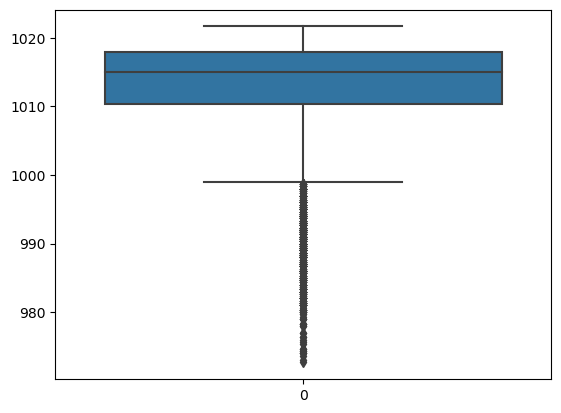

In [14]:
sns.boxplot(df_train['Valencia_pressure'])

<br>

From the boxplot above, the `valencia_pressure` feature has values between 1010 and less than 1020

<br>

In [15]:
# Checking the Summary statistics of Valencia_pressure

print('Mean:', df_train['Valencia_pressure'].mean(), '\n')

print('Median:', df_train['Valencia_pressure'].median(), '\n')

print('Mode:', df_train['Valencia_pressure'].mode())

Mean: 1012.0514065222798 

Median: 1015.0 

Mode: 0    1018.0
Name: Valencia_pressure, dtype: float64


### Choosing the measure to replace null values

As observed all three measures of central tendency have very similar values, as such there wouldn't be too much of a difference which measure we choose to go with. However, for the purpose of this model, we shalll replace the null values in "Valencia pressure" with the mean, since it is a better measure for the datatype.

In [16]:
#Replacing the null values with the mean

df_clean_train = df_train
df_clean_train['Valencia_pressure'] = df_clean_train['Valencia_pressure'].fillna(df_clean_train['Valencia_pressure'].mean())

In [17]:
# Confirming that the null values have been replaced

df_clean_train.isnull().sum()

time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_

In [18]:
df_clean_train.shape

(8763, 48)

<br>

### DATA TYPES

Now that the null values have been taken care of, we can check to identify the data types contained in the dataset. Machine learning models only work with numeric data, which means the data types for the models must be floats or integers in order to get the best predictions out of the models built from our data. Also, having the right data types is needed for visualizing the dataset during the Exploratory Data Analysis (EDA).The code bellow reveals the data types of the data contained in our data set. Note that the `time` data, the `Valencia_wind_deg` data as well as the `Seville_pressure` are all object data (also known as strings). These have to be converted to floats or integers for them to be usable both for EDA and model training. Similar to the null values, they can either be dropped or converted.The former is not recommended as everytime a data is dropped, potentially valuable information that may be very useful for your model building efforts are being lost. A more beneficial approach will be to process this data by Transforming it to numeric form or encoding it to a form that the model can utilize. 3 non-numeric objects are observed from the data set. they are `time`, `Valencia_wind_deg` and `Seville_pressure`


In [19]:
df_clean_train.dtypes

time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_pressure         float64
Valencia

<br>

### Modifying the time feature

The `time` feature is mapped into a datetime format which is the appropriate data type for date and time features and other features can be created from the date time feature that can be used in the model training.

In [20]:
df_clean_train['time'] = pd.to_datetime(df_clean_train['time'])
df_clean_train.time

0      2015-01-01 03:00:00
1      2015-01-01 06:00:00
2      2015-01-01 09:00:00
3      2015-01-01 12:00:00
4      2015-01-01 15:00:00
               ...        
8758   2017-12-31 09:00:00
8759   2017-12-31 12:00:00
8760   2017-12-31 15:00:00
8761   2017-12-31 18:00:00
8762   2017-12-31 21:00:00
Name: time, Length: 8763, dtype: datetime64[ns]

In [21]:
df_clean_train.shape

(8763, 48)

<br>

This datetime feature can now be used to create some time-dependent plots

<Axes: xlabel='time', ylabel='load_shortfall_3h'>

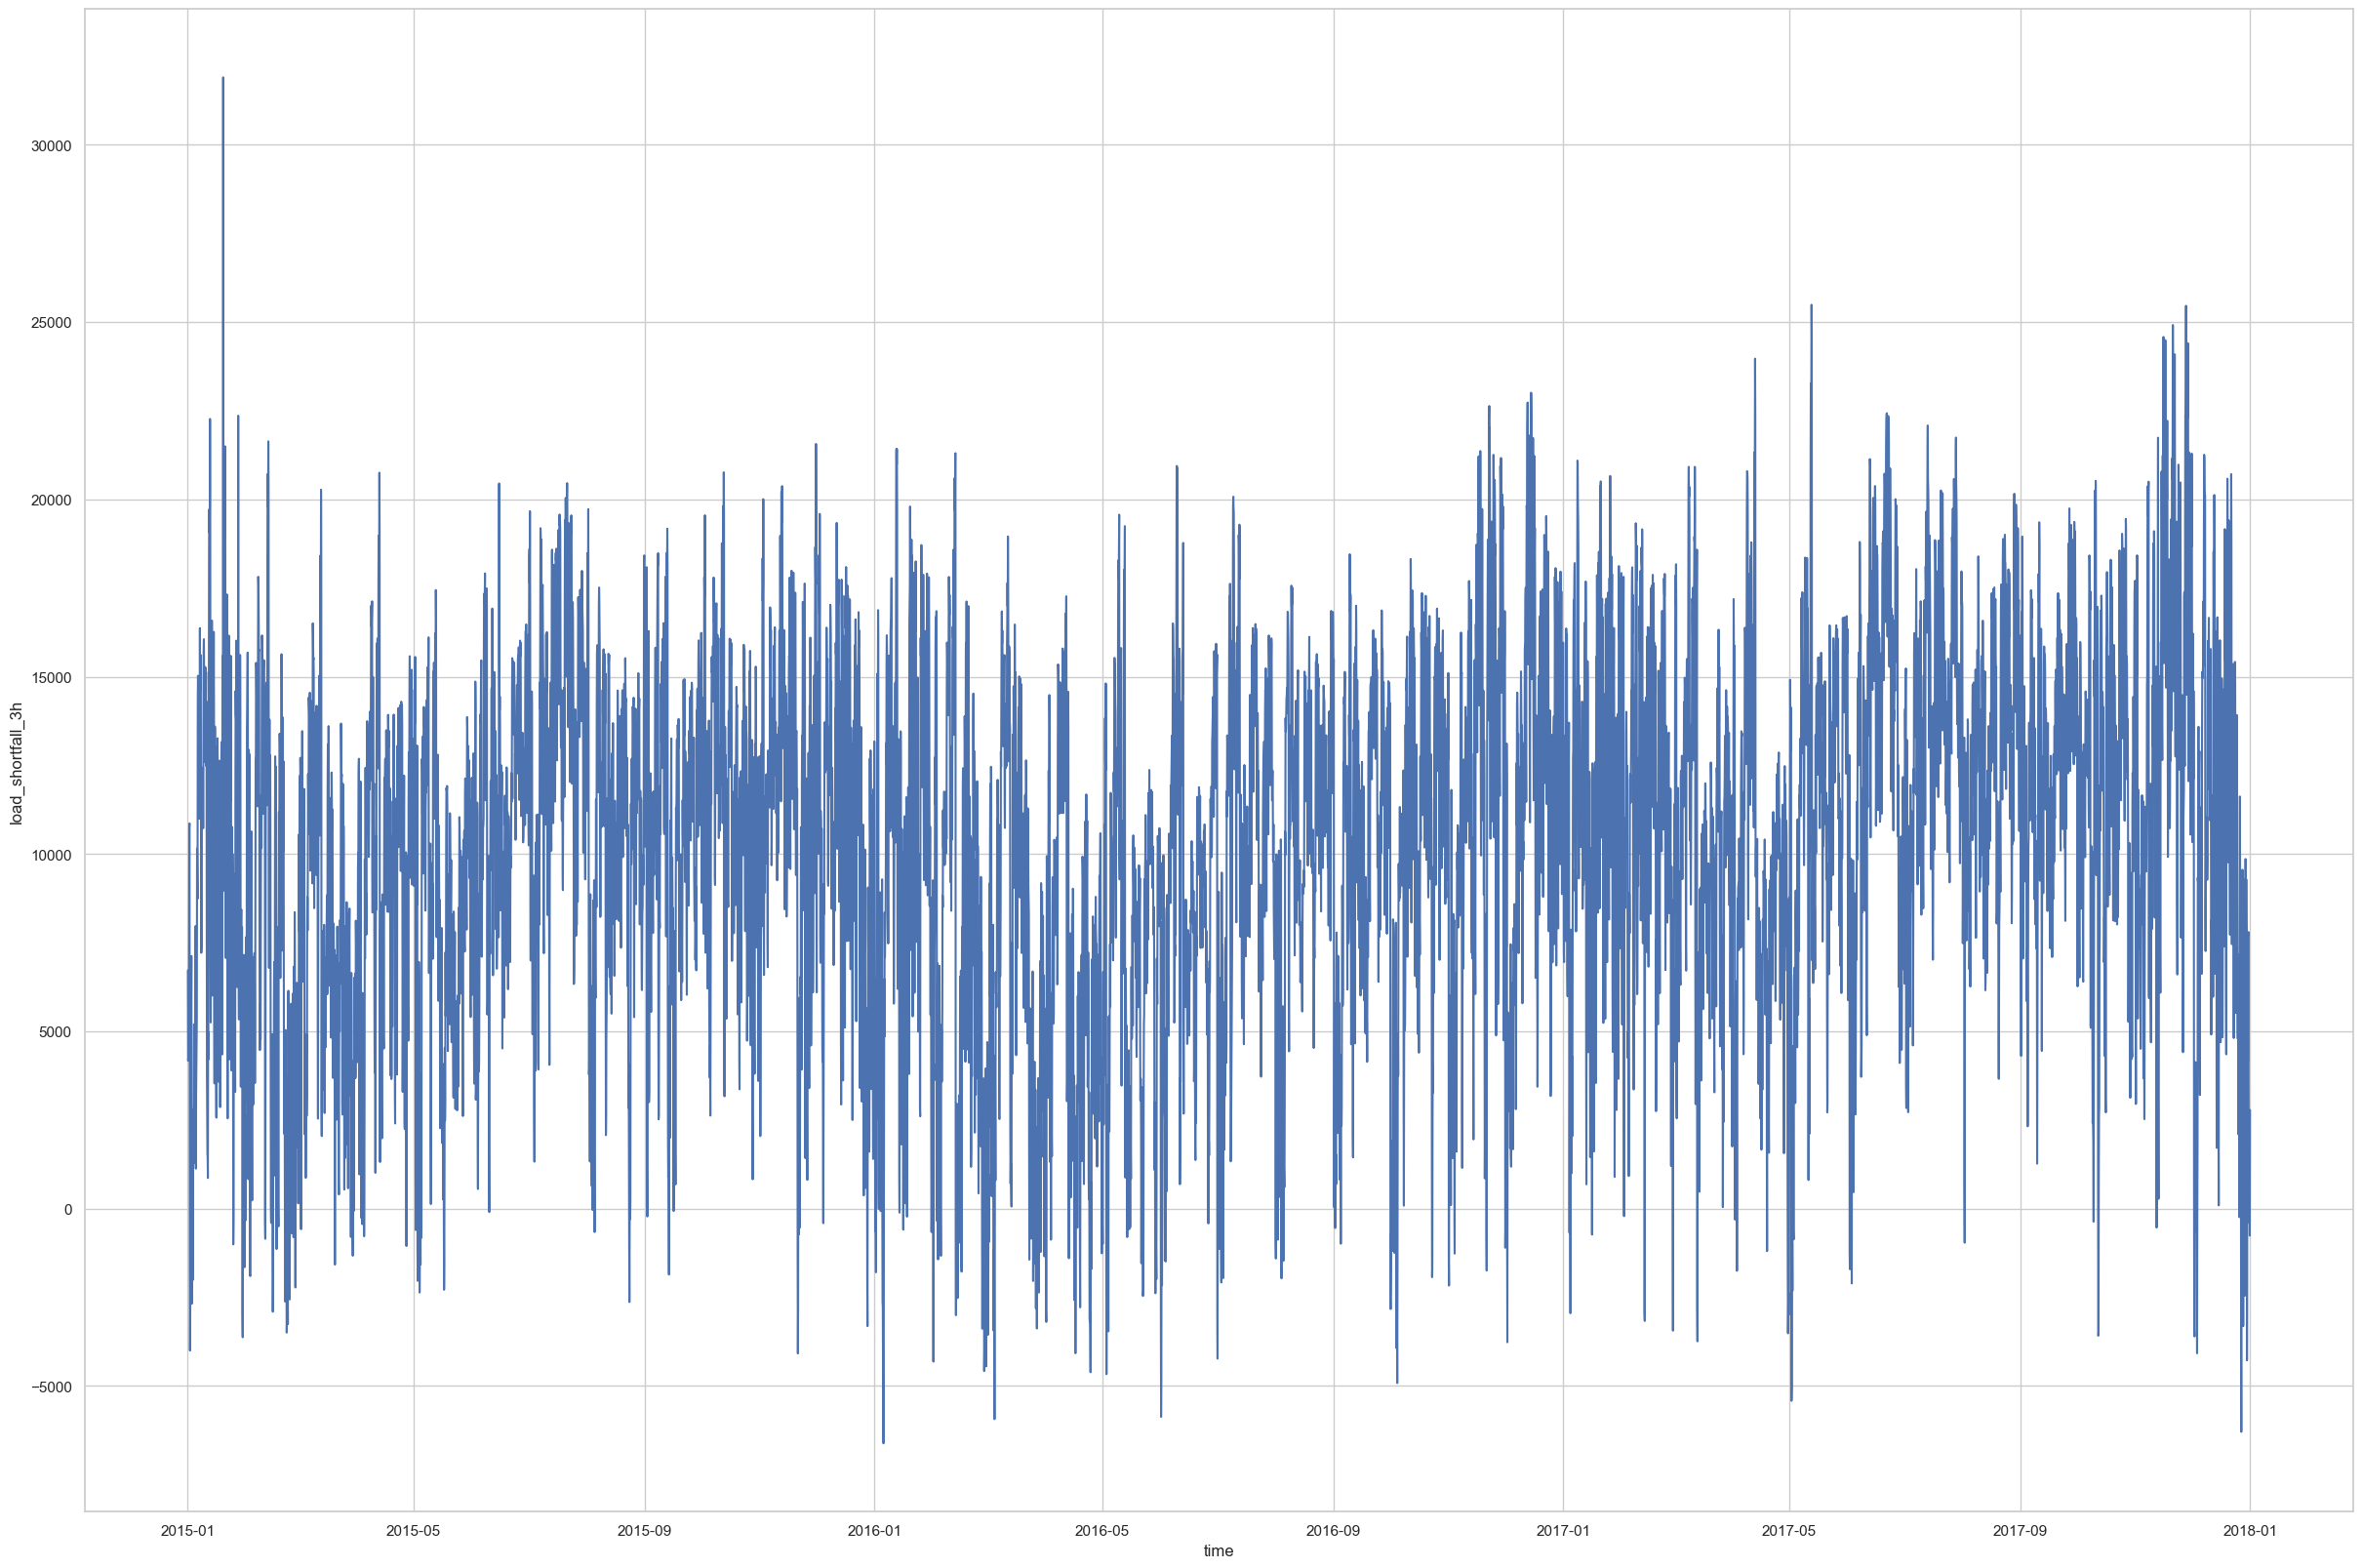

In [22]:
# Visualizing the load_shortfall as a function of time

sns.set(style="whitegrid") # Style for the plot
plt.figure(figsize=(30, 20)) # Setting the figure size

sns.lineplot(data=df_clean_train, x='time', y='load_shortfall_3h')

<br>

The plot above is showing very little information. Visualizing the load shortfall as a function of other date-time parameters may provide better insight to the pattern of the load short fall.

As such other date time parameters were extracted from the time feature

In [23]:
df_clean_train.shape

(8763, 48)

In [24]:
column_list =[]

# second
df_clean_train['second'] = df_clean_train['time'].dt.second

# minute
df_clean_train['minute'] = df_clean_train['time'].dt.minute

# hour
df_clean_train['hour'] = df_clean_train['time'].dt.hour

# day
df_clean_train['Day'] = df_clean_train['time'].dt.day

# month
df_clean_train['Month'] = df_clean_train['time'].dt.month

# year
df_clean_train['Year'] = df_clean_train['time'].dt.year


# adding the new features to the dataset 
column_list = ['time', 'second', 'minute', 'hour','Day','Month','Year'] + list(df_clean_train.columns[1:-6])



df_clean_train = df_clean_train[column_list]


In [25]:
df_clean_train

,time,second,minute,hour,Day,Month,Year,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0,0,3,1,1,2015,0.666667,level_5,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0,0,6,1,1,2015,0.333333,level_10,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,0,0,9,1,1,2015,1.000000,level_9,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,0,0,12,1,1,2015,1.000000,level_8,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,0,0,15,1,1,2015,1.000000,level_7,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,2017-12-31 09:00:00,0,0,9,31,12,2017,1.000000,level_6,0.0,...,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,2017-12-31 12:00:00,0,0,12,31,12,2017,5.000000,level_6,0.0,...,283.483333,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,2017-12-31 15:00:00,0,0,15,31,12,2017,6.333333,level_9,0.4,...,285.150000,289.816667,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000
8761,2017-12-31 18:00:00,0,0,18,31,12,2017,7.333333,level_8,0.2,...,283.483333,287.523333,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000


In [26]:
df_clean_train.shape

(8763, 54)

In [27]:
# Checking the number of entries in the second and minute columns that are zeros

df_clean_train[(df_clean_train['second'] == 0) & (df_clean_train['minute'] == 0)][['second', 'minute']].count()

second    8763
minute    8763
dtype: int64

From the result above, the values in the `second` and `minute` columns are all zeros and as such will be dropped from the dataframe.

It is equally imperative to check the range of values in the remaining date and time columns, that is, `hour`, `day`, `month`, and `year`

In [28]:
# Number of unique values in the hour column

df_clean_train['hour'].unique()

array([ 3,  6,  9, 12, 15, 18, 21,  0], dtype=int64)

It's reasonable to see that the hour are in multiples of three as the shortfalls were recorded every three hours

In [29]:
# Number of unique values in the Day column

df_clean_train['Day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [30]:
# Number of unique values in the Month column

df_clean_train['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [31]:
# Number of unique values in the Year column

df_clean_train['Year'].unique()

array([2015, 2016, 2017], dtype=int64)

<br>

It is rather intuitive to visualize the `load_shortfall` against `hour`, `Day`, and `Month`.

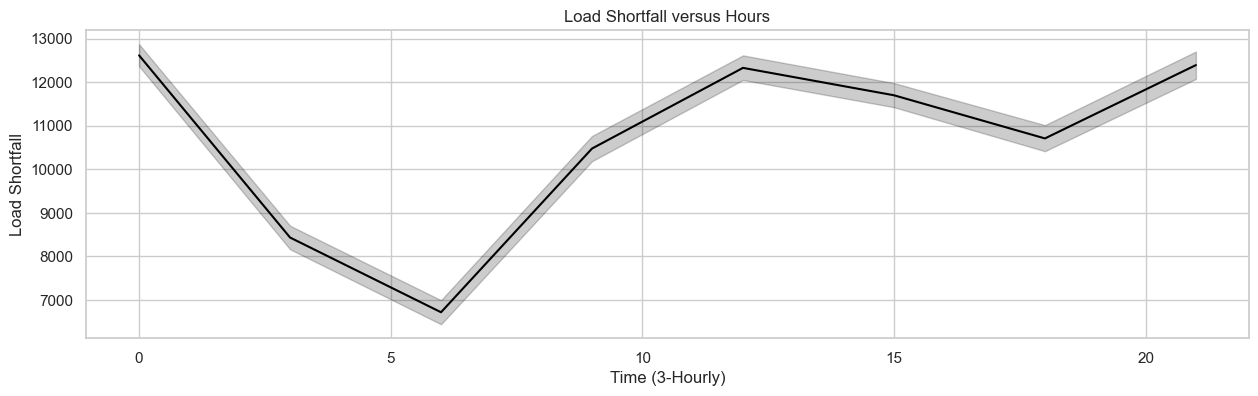

In [49]:
# Visualizing the load_shortfall as a function of hour

print()

plt.figure(figsize=(15, 4))

sns.set_context('poster', font_scale=4)
sns.set(style="whitegrid") # Style for the plot

sns.lineplot(data=df_clean_train, x='hour', y='load_shortfall_3h', color='black')

plt.title("Load Shortfall versus Hours")
plt.xlabel("Time (3-Hourly)")
plt.ylabel("Load Shortfall")
plt.show()

<br>

From the plot above, the highest shortfall is experienced at around the twelfth hour of the day and at around sixth hour of the day, the lowest shortfall was recorded.

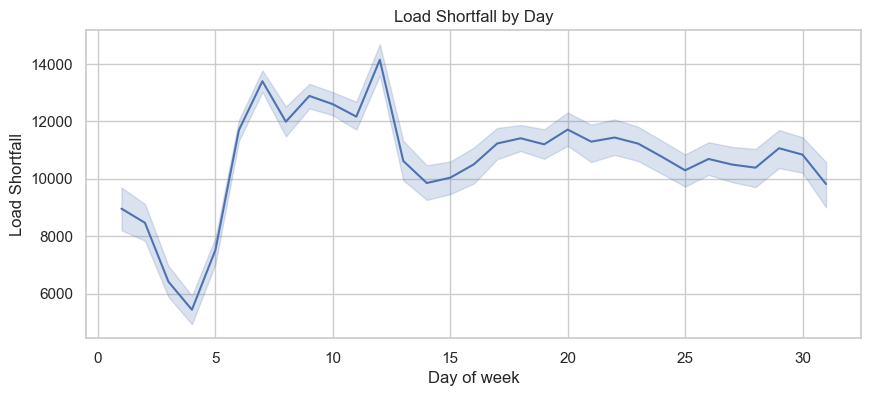

In [52]:
# Visualizing the load_shortfall as a function of hour

plt.figure(figsize=(10, 4)) # Setting the figure size

sns.set_context('poster', font_scale=4)
sns.set(style="whitegrid")

sns.lineplot(data=df_clean_train, x='Day', y='load_shortfall_3h')

plt.title("Load Shortfall by Day")
plt.xlabel("Day of week")
plt.ylabel("Load Shortfall")
plt.show()

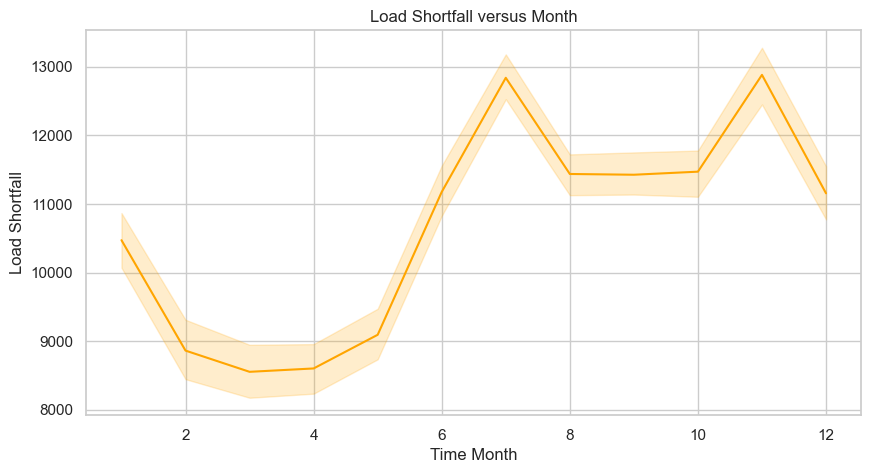

In [54]:
# Visualizing the load_shortfall as a function of hour

plt.figure(figsize=(10, 5)) # Setting the figure size

sns.set_context('poster', font_scale=4)
sns.set(style="whitegrid") # Style for the plot

sns.lineplot(data=df_clean_train, x='Month', y='load_shortfall_3h', color='orange')

plt.title("Load Shortfall versus Month")
plt.xlabel("Time Month")
plt.ylabel("Load Shortfall")
plt.show()

In [ ]:
# Madrid

df_hist = df_train
df_Madrid = df_hist.filter(['time', 'Madrid_wind_speed','Madrid_humidity', 'Madrid_clouds_all',
'Madrid_rain_1h','Madrid_weather_id','Madrid_pressure', 'Madrid_temp_max',
'Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h'])

In [ ]:
# Bilbao

df_hist = df_train
df_Bilbao = df_hist.filter(['time', 'Bilbao_wind_speed','Bilbao_humidity', 'Bilbao_clouds_all',
'Bilbao_rain_1h','Bilbao_weather_id','Bilbao_pressure', 'Bilbao_temp_max',
'Bilbao_temp', 'Bilbao_temp_min', 'load_shortfall_3h'])

In [ ]:
# Barcelona

df_hist = df_train
df_Barcelona = df_hist.filter(['time', 'Barcelona_wind_speed','Barcelona_humidity', 'Barcelona_clouds_all',
'Barcelona_rain_1h','Barcelona_weather_id','Barcelona_pressure', 'Barcelona_temp_max',
'Barcelona_temp', 'Barcelona_temp_min', 'load_shortfall_3h'])

In [ ]:
# Barcelona

df_hist = df_train
df_Barcelona = df_hist.filter(['time', 'Barcelona_wind_speed','Barcelona_humidity', 'Barcelona_clouds_all',
'Barcelona_rain_1h','Barcelona_weather_id','Barcelona_pressure', 'Barcelona_temp_max',
'Barcelona_temp', 'Barcelona_temp_min', 'load_shortfall_3h'])

In [ ]:
# Seville

df_hist = df_train
df_Seville = df_hist.filter(['time', 'Seville_wind_speed','Seville_humidity', 'Seville_clouds_all',
'Seville_rain_1h','Seville_weather_id','Seville_pressure', 'Seville_temp_max',
'Seville_temp', 'Seville_temp_min', 'load_shortfall_3h'])

In [ ]:
# Valencia

df_hist = df_train
df_Valencia = df_hist.filter(['time', 'Valencia_wind_speed','Valencia_humidity', 'Valencia_clouds_all',
'Valencia_rain_1h','Valencia_weather_id','Valencia_pressure', 'Valencia_temp_max',
'Valencia_temp', 'Valencia_temp_min', 'load_shortfall_3h'])

### Dropping irrelevant features

Here we dropped features that are not useful to our model. Features dropped include the "time" column and other columns with multicollinearity as identified during the EDA phase. Some of these Features were dropped based on their inherent characteristics. The second, minute, and rain_1h columns for instance comprises mostly zeros, and will as such contribute very little to the model. Seville_pressure was dropped as it doesn't conform with the rest of the pressure columns. While other pressure columns appear to be continuous data, the Seville_pressure column appears to be a categorical data. Likewise the Valencia_wind_deg feature.

### The Valencia_wind_deg Column
The next object in the dataset is the "Valencia_wind_deg". This is recorded as levels which are denoted by the string "level" followed by a number which describes that particular level. To encode this, we can simply extract the number from the column that identifies that level. This line of code can help us to achieve that

In [ ]:
df_modified['Valencia_wind_deg']

In [ ]:
df_modified['Valencia_wind_deg'] = df_modified['Valencia_wind_deg'].str.extract('(\d+)')
df_modified['Valencia_wind_deg']

As you can see above, the data has been reduced to a number without the string "level" to define it but there is still a problem. The data type is still an object. we can convert the object to numeric form by using the pandas numeric function.

In [ ]:
df_modified['Valencia_wind_deg'] = pd.to_numeric(df_modified['Valencia_wind_deg'])
df_modified.Valencia_wind_deg

Repeat the process for Seville_pressure

In [ ]:
df_modified['Seville_pressure'] = df_modified['Seville_pressure'].str.extract('(\d+)')

In [ ]:
df_modified['Seville_pressure']

In [ ]:
df_modified['Seville_pressure'] = pd.to_numeric(df_modified['Seville_pressure'])
df_modified['Seville_pressure']

In [ ]:
df_modified.dtypes

In [ ]:
remove_X_features = ['minute', 'second', 'Valencia_wind_deg', 'Seville_temp_max','Seville_temp', 'Madrid_temp',
                     'Bilbao_rain_1h', 'Barcelona_rain_1h', 'Seville_rain_1h', 'Madrid_rain_1h', 'Seville_pressure', 
                     'Valencia_snow_3h', 'Barcelona_rain_3h', 'Seville_rain_3h', 'Seville_clouds_all', 'Madrid_clouds_all',
                     'Bilbao_snow_3h', 'Valencia_snow_3h']

df_modified = df_modified.drop(remove_X_features, axis = 1)

In [ ]:
count = 0
l1 = []
l2 = []
l3 = []
l4 = []
for i in df_modified.columns:
    if count < 12:
        l1.append(i)
    elif count > 11 and count < 22:
        l2.append(i)
    elif count > 21 and count < 33:
        l3.append(i)
    else:
        l4.append(i)
    
    count = count + 1

df_modified1 = df_modified[l1]
df_modified2 = df_modified[l2]
df_modified3 = df_modified[l3]
df_modified4 = df_modified[l4]

In [ ]:
df_modified_train = df_clean_train
df_modified_train = df_modified_train.drop([ 'time','Madrid_temp_min','Madrid_temp_max','Seville_temp_min', 'Bilbao_temp_max','Bilbao_temp_min','Valencia_temp_max','Valencia_temp_min','Barcelona_temp_max','Barcelona_temp_min','minute', 'second', 'Valencia_wind_deg', 'Seville_temp_max','Seville_temp', 'Madrid_temp',
                     'Bilbao_rain_1h', 'Barcelona_rain_1h', 'Seville_rain_1h', 'Madrid_rain_1h', 'Seville_pressure', 'Valencia_snow_3h', 'Barcelona_rain_3h', 'Seville_rain_3h', 'Seville_clouds_all', 'Madrid_clouds_all','Bilbao_snow_3h', 'Valencia_snow_3h'], axis = 1)

In [ ]:
df_modified_train.head()

In [ ]:
pd.DataFrame(df_modified_train.columns, columns=['Features'])

In [ ]:
pd.DataFrame(df_modified_train.dtypes, columns=['Data-type'])

## Variables Selection by Correlation and Significance

In [ ]:
column_titles = [col for col in x if col != 'load_shortfall_3h'] + ['load_shortfall_3h']

In [ ]:
from statsmodels.formula.api import ols

df_pval = df_modified[:len(df_train)].copy()

y_name = 'load_shortfall_3h'

x_names = [col for col in df_pval.columns if col != y_name]


formula_str = y_name + "~" + "+".join(x_names)
print('Formular:\n\t{}'.format(formula_str))

In [ ]:
model = ols(formula=formula_str, data=df_pval)

fitted = model.fit()

print(fitted.summary())

In [ ]:
corr_values = df_pval.corr()['load_shortfall_3h'].sort_values(ascending=False)

corr_values

In [ ]:
from scipy.stats import pearsonr

dict_corr_p = {}

column_titles_pr = [col for col in corr_values.index if col not in ['load_shortfall_3h', 'minute', 'second']]
for col in column_titles_pr:
    p_val = round(pearsonr(df_pval[col], df_pval['load_shortfall_3h'])[1], 6)
    dict_corr_p[col] = {'Correlation coefficient': corr_values[col],
                       'P_Value': p_val}
    
df_corr_p = pd.DataFrame(dict_corr_p).T
df_corr_p_sorted = df_corr_p.sort_values('P_Value')
df_corr_p_sorted[df_corr_p_sorted['P_Value']<0.1]

In [ ]:
x_names_sig = list(df_corr_p.index)

x_data = x[x_names_sig]

m_col = x_data.corr()

r, c = np.where(np.abs(m_col)>0.9)

off_diagonal = np.where(r != c)

multicol_df = m_col.iloc[r[off_diagonal], c[off_diagonal]]

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we created two models that enable us to accurately predict the thee hour load shortfall. |

---



In [ ]:
# split data
y = df_modified_train[['load_shortfall_3h']]
x = df_modified_train.drop('load_shortfall_3h',axis=1)

In [ ]:
x.head()

In [ ]:
y.head()

### Building One or More ML Models

First we created a base model, and two other models. In this case, our base model is a simple linear regression model. Other models created to improve predictive performance are the random forest and lasso regression models.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.34,random_state=50)

#### i. Linear Regression Model

In [ ]:
# Declare the model object
lm = LinearRegression()

# fit linear model
lm.fit(x_train, y_train)

prediction_lm = lm.predict(x_test)


#### ii. Random Forest Regression Model
Random forests or random decision forests is an ensemble learning method. In the following cells, the random forest regression model will be loaded, trained and used to predict the load shortfall from the given data set.

In [ ]:
# Fitting Random Forest Regression to the dataset

# create regressor object
Rfr = RandomForestRegressor(n_estimators = 100, max_depth=15, random_state=18)

Rfr.fit(x_train, np.ravel(y_train))

predictions_Rfr_test = Rfr.predict(x_test)

#### iii. LASSO Regression Model

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(x_train, y_train)

predictions_lasso_test = lasso.predict(x_test)


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section we compared the relative performance of the various trained ML models on a holdout dataset and indicated which is the best and why. |

---

### The root mean square value (RMSE)

The root mean squared error (RMSE) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the actual values observed. It is a very useful tool in telling how well the model predicted the values using the test dataset. Below is a function that calculates and returns the
average RMSE of the model.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Compare model performance
# LINEAR REGRESSION MODEL

## TRAIN
prediction_lm_train = lm.predict(x_train)
MSE_lm_train = mean_squared_error(y_train, prediction_lm_train)
R_2_lm_train = r2_score(y_train, prediction_lm_train)
RMSE_lm_train = np.sqrt(MSE_lm_train)


## TEST
prediction_lm_test = lm.predict(x_test)
MSE_lm_test = mean_squared_error(y_test, prediction_lm_test)
R_2_lm_test = r2_score(y_test, prediction_lm_test)
RMSE_lm_test = np.sqrt(MSE_lm_test)



# REGRESSION MODEL USING RANDOM FOREST
## TRAIN
prediction_Rfr_train = Rfr.predict(x_train)
MSE_Rfr_train = mean_squared_error(y_train, prediction_Rfr_train)
R_2_Rfr_train = r2_score(y_train, prediction_Rfr_train)
RMSE_Rfr_train = np.sqrt(MSE_Rfr_train)


## TEST
predictions_Rfr_test = Rfr.predict(x_test)
MSE_Rfr_test = mean_squared_error(y_test, predictions_Rfr_test)
R_2_Rfr_test = r2_score(y_test, predictions_Rfr_test)
RMSE_Rfr_test = np.sqrt(MSE_Rfr_test)


# LASSO REGRESSION MODEL
## TRAIN
prediction_lasso_train = lasso.predict(x_train)
MSE_lasso_train = mean_squared_error(y_train, prediction_lasso_train)
R_2_lasso_train = r2_score(y_train, prediction_lasso_train)
RMSE_lasso_train = np.sqrt(MSE_lasso_train)


## TEST
predictions_lasso_test = lasso.predict(x_test)
MSE_lasso_test = mean_squared_error(y_test, predictions_lasso_test)
R_2_lasso_test = r2_score(y_test, predictions_lasso_test)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

In [ ]:
# dictionary of results

results_dict = {'Training R-Square Score':
                        {
                            "Linear Regression Model": R_2_lm_train,
                           # "Linear Regression Model p_val": R_2_lm_corr_pval_train,
                            "LASSO": R_2_lasso_train,
                            "Random Forest": R_2_Rfr_train
                        },
                
                    'Test R-Square Score':
                        {
                            "Linear Regression Model": R_2_lm_test,
                            #"Linear Regression Model p_val": R_2_lm_corr_pval_test,
                           "LASSO": R_2_lasso_test,
                            "Random Forest": R_2_Rfr_test
                        },
                
                    'Training RMSE':
                        {
                            "Linear Regression Model": RMSE_lm_train,
                         #   "Linear Regression Model p_val": RMSE_lm_corr_pval_train,
                            "LASSO": RMSE_lasso_train,
                            "Random Forest": RMSE_Rfr_train
                        },
                
                    'Test RMSE':
                        {
                            "Linear Regression Model": RMSE_lm_test,
                          #  "Linear Regression Model p_val": RMSE_lm_corr_pval_test,
                           "LASSO": RMSE_lasso_test,
                            "Random Forest": RMSE_Rfr_test
                        }
                }

# create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)

pd.options.display.float_format = "{:,.5f}".format
results_df = results_df.astype(float)

### Model Performance Results





In [ ]:
results_df

In [ ]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
pred = [lm.predict(x_test), Rfr.predict(x_test), lasso.predict(x_test)]
title = ['Linear Regression','Random Forest', 'LASSO Regression']

# Loop through all axes to plot each model's results 
for i in range(3):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i]) 

In [ ]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Linear Regression')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,prediction_lm)
ax.plot(y_test,y_test,'r')
plt.show()

In [ ]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Random Forest')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,predictions_Rfr_test)
ax.plot(y_test,y_test,'r')
plt.show()

In [ ]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Lasso Regression')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,predictions_lasso_test)
ax.plot(y_test,y_test,'r')
plt.show()

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, we discuss the how the model with the best performance based on the analysis in the previous section works. |

---


From our test results as displayed in the previous section, it can be observed that the Random Forest model gives a better RMSE and R_2 score, thus making it the best model among the three prediction models built.

### Understanding Random Forest Models

A **Random Forest** is a powerful non-parametric algorithm (ie an algorithm that does not make strong assumptions about the form of the mapping function, but instead is free to learn any functional form from the training dataset). It is important to note that non-parametric models like this are good when you have a lot of data with no prior knowledge, and you don’t want to worry too much about choosing just the right features.

Random Forest is an example of an ensemble method built on decision trees. Ensemble methods is a machine learning technique that combines several base models in order to produce one optimal predictive model. In other words, a random forest model relies on aggregating the results of an ensemble of decision trees.